In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3 MB 16 kB/s 


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/fishesdataset/train'
valid_path = '/content/drive/MyDrive/fishesdataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/fishesdataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/fishesdataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 207 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/fishesdataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
7/7 [==============================] - 77s 11s/step - loss: 5.3404 - accuracy: 0.6329 - val_loss: 1.3493 - val_accuracy: 0.8511
Epoch 2/20
7/7 [==============================] - 34s 5s/step - loss: 0.8305 - accuracy: 0.8792 - val_loss: 0.5954 - val_accuracy: 0.8723
Epoch 3/20
7/7 [==============================] - 34s 5s/step - loss: 0.3348 - accuracy: 0.9565 - val_loss: 0.2071 - val_accuracy: 0.9574
Epoch 4/20
7/7 [==============================] - 34s 5s/step - loss: 0.0664 - accuracy: 0.9855 - val_loss: 0.6716 - val_accuracy: 0.9362
Epoch 5/20
7/7 [==============================] - 35s 5s/step - loss: 0.0607 - accuracy: 0.9855 - val_loss: 0.2826 - val_accuracy: 0.9787
Epoch 6/20
7/7 [==============================] - 38s 5s/step - loss: 3.1258e-04 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9574
Epoch 7/20
7/7 [==============================] - 34s 5s/step - loss: 0.0250 - accuracy: 0.9952 - val_loss: 0.1488 - val_accuracy: 0.9787
Epoch 8/20
7/7 [=============

In [ ]:
import matplotlib.pyplot as plt

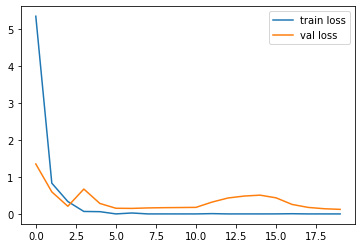

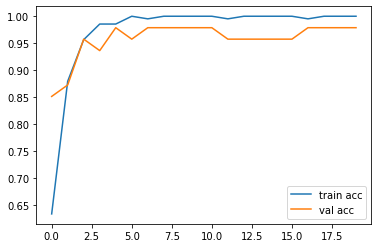

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# saved the model as a .h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model_inception_fish.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[9.9835157e-01, 1.6484800e-03],
       [1.0000000e+00, 6.3487631e-28],
       [1.0000000e+00, 1.0257418e-25],
       [1.0000000e+00, 1.4919188e-14],
       [2.0730012e-28, 1.0000000e+00],
       [1.0000000e+00, 4.8628209e-16],
       [1.0000000e+00, 1.4815182e-13],
       [1.0000000e+00, 1.8440189e-20],
       [2.1265415e-31, 1.0000000e+00],
       [1.2979515e-24, 1.0000000e+00],
       [7.4429944e-14, 1.0000000e+00],
       [1.0000000e+00, 5.4951914e-21],
       [3.0588330e-13, 1.0000000e+00],
       [1.0000000e+00, 1.4815182e-13],
       [1.4678126e-06, 9.9999857e-01],
       [5.8003957e-09, 1.0000000e+00],
       [1.0000000e+00, 5.4964748e-12],
       [1.0541651e-16, 1.0000000e+00],
       [3.1458971e-03, 9.9685413e-01],
       [1.0000000e+00, 2.4977898e-13],
       [2.3659854e-07, 9.9999976e-01],
       [4.7878468e-10, 1.0000000e+00],
       [1.2979515e-24, 1.0000000e+00],
       [1.4204085e-15, 1.0000000e+00],
       [1.0000000e+00, 4.4204852e-12],
       [1.4004687e-08, 1.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/model_inception_fish.h5')

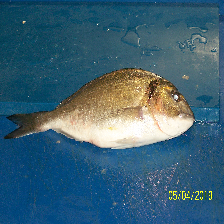

In [ ]:
img=image.load_img('/content/drive/MyDrive/fishesdataset/test/normal/h6.JPG',target_size=(224,224))
img


In [ ]:
x=image.img_to_array(img)
x

array([[[  2.,  57.,  96.],
        [  0.,  58.,  95.],
        [  6.,  59., 101.],
        ...,
        [  6.,  70., 116.],
        [ 18.,  72., 119.],
        [ 29.,  70., 124.]],

       [[  1.,  45.,  80.],
        [  3.,  49.,  82.],
        [  6.,  50.,  87.],
        ...,
        [ 19.,  71., 121.],
        [  0.,  77., 121.],
        [ 11.,  69., 115.]],

       [[  5.,  47.,  71.],
        [  9.,  49.,  74.],
        [  6.,  53.,  73.],
        ...,
        [  6.,  74., 119.],
        [  7.,  76., 115.],
        [  2.,  57., 111.]],

       ...,

       [[  5.,  69., 117.],
        [  5.,  69., 113.],
        [  4.,  66., 113.],
        ...,
        [ 12.,  79., 122.],
        [ 33.,  77., 122.],
        [ 35.,  79., 116.]],

       [[ 18.,  77., 121.],
        [ 10.,  67., 120.],
        [  6.,  68., 119.],
        ...,
        [ 35.,  82., 126.],
        [ 37.,  78., 130.],
        [ 45.,  91., 127.]],

       [[ 40.,  84., 121.],
        [ 21.,  77., 126.],
        [ 20.,  

In [ ]:
x.shape


(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)

In [ ]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.33896142, 0.66103864]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)
if a[0]==0:
    print("The fish is infected")
else:
    print("The fish is healthy")
        

[1]
The fish is healthy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
